<a href="https://colab.research.google.com/github/luiscascelli/libpythonpro/blob/master/Agricultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #utilizada para tratar vetores e matrizes
import tensorflow as tf
import keras  #utilizada para criar os modelos de deep learning
#from keras import backend as k #utiliza
from tensorflow.keras.models import Sequential #utilizada para criar o modelo sequencial
from tensorflow.keras.layers import Activation #utilizada para obter a funcao de ativação
from tensorflow.keras.layers import Dense,Flatten,Conv2D #utilizada para importar as camadas Dense e Flatten
from tensorflow.keras.optimizers import Adam # utilizada para importar o otimizador do tipo Adam
from tensorflow.keras.metrics import categorical_crossentropy #utilizada para avaliar o modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator #utilizada no pre-processamento das imagens
from tensorflow.keras.layers import BatchNormalization #utilizada para normalizar as "bateladas" no processo de treinamento
from tensorflow.keras.layers import * #importa todos os tipos de camadas
from matplotlib import pyplot as plt #utilizada para realizar o plot dos gráficos
from sklearn.metrics import confusion_matrix #utilizada para criar a matriz de confusão
import itertools #utilizada para criar os iterators (para os loops)
import matplotlib.image as mpimg  #utilizada para realizar o plot das imagens
from mlxtend.plotting import plot_confusion_matrix  #utilizar para plotar a matriz de confusão 

Using TensorFlow backend.


In [0]:
#caminhos para cada um dos conjuntos de imagens a serem utilizadas
caminho_treinamento='BD_treinamento'  #dividido em 2 pastas (sadias e contaminadas) - 60/60
caminho_validacao='BD_validacao' #dividido em 2 pastas (sadias e contaminadas) - 20/20
caminho_teste='BD_teste' #dividido em 2 pastas (sadias e contaminadas) - 25/25

In [0]:
#---------------------------------------------------
# Conhecendo e Preparando o BD
#----------------------------------------------------

#cria a batelada utilizando dados que estão no disco 
# ImageDataGenerator - utilizada para adicionar as imagens e converter em um formato padrão (224x224)
batelada_treino=ImageDataGenerator().flow_from_directory(caminho_treinamento,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)
batelada_validacao=ImageDataGenerator().flow_from_directory(caminho_validacao,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=5)
batelada_teste=ImageDataGenerator().flow_from_directory(caminho_teste,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [0]:
#utilizado para interar sobre a batelada de dados 
img,labels = next(batelada_treino)

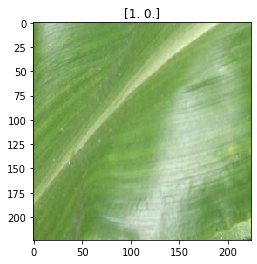

In [0]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(img[0].astype(np.uint8)) # seleciona a imagem da posição [0]
plt.title("{}".format(labels[0]))
plt.show()  # mostra a imagem

In [0]:
#---------------------------------------------------
# Criando o primeiro modelo de classificação
#----------------------------------------------------

#criando o modelo de rede convolucionária
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))# 32= número de neurônios na camada/ (3,3)= filtro utilizado para percorrer 
#a imagem / (224,224,3)= tamanho das imagens comprimento 224x largura 224 e RGB=3
model.add(Flatten()) #utilizada para criar um vetor para a entrada de dados na camada de saída
model.add(Dense(2,activation='softmax'))# camada de saída da rede 2 neurônios. 10= sadia /01= contaminada

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#mostrando a configuração da rede CNN criada
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [0]:
#definindo o otimizador e a função perda
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#treinamento do modelo
history=model.fit_generator(batelada_treino,steps_per_epoch=12,validation_data=batelada_validacao,validation_steps=4,epochs=20,verbose=2)
#deve ser utilizada, pois estamos realizando o treinamento via batelada
#steps_per_epoch = define a quantidade de epocas utilizadas para treinamento, baseando-se no numero de dados utilizados
#vamos utilizar 120 imagens para treinamento (60 sadias e 60 contaminadas), como a batelada é de 10, temos 120/10 = 12 vezes
# validation_data = utilizado para gerar a validação (compara o desempenho do treinamento com o valor real): a cada epoca de treinamento,
#compara o resultado obtido com a previsão realizada nas
#imagens de validação
#verbose=2 - indica o que desejamos exibir na saída do treinamento

Epoch 1/20
12/12 - 4s - loss: 789.1568 - acc: 0.4833 - val_loss: 28.0006 - val_acc: 0.7500
Epoch 2/20
12/12 - 3s - loss: 182.9669 - acc: 0.5417 - val_loss: 406.2745 - val_acc: 0.6000
Epoch 3/20
12/12 - 3s - loss: 196.5449 - acc: 0.5917 - val_loss: 52.9659 - val_acc: 0.7000
Epoch 4/20
12/12 - 3s - loss: 47.4954 - acc: 0.8000 - val_loss: 80.2571 - val_acc: 0.6500
Epoch 5/20
12/12 - 3s - loss: 78.7901 - acc: 0.7250 - val_loss: 60.8529 - val_acc: 0.6500
Epoch 6/20
12/12 - 3s - loss: 117.0346 - acc: 0.6750 - val_loss: 72.4978 - val_acc: 0.6500
Epoch 7/20
12/12 - 3s - loss: 25.3324 - acc: 0.9333 - val_loss: 97.8816 - val_acc: 0.6500
Epoch 8/20
12/12 - 3s - loss: 9.4287 - acc: 0.9417 - val_loss: 84.0630 - val_acc: 0.7000
Epoch 9/20
12/12 - 3s - loss: 6.0531 - acc: 0.9667 - val_loss: 94.3155 - val_acc: 0.6500
Epoch 10/20
12/12 - 3s - loss: 1.9361 - acc: 0.9750 - val_loss: 78.5531 - val_acc: 0.7500
Epoch 11/20
12/12 - 3s - loss: 0.1837 - acc: 0.9833 - val_loss: 53.6783 - val_acc: 0.6500
Epoch 1

In [0]:
# Lista os dados históricos do treinamento
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


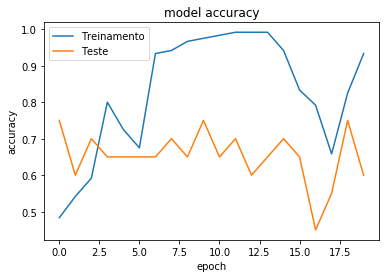

In [0]:
# summarize history para a accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

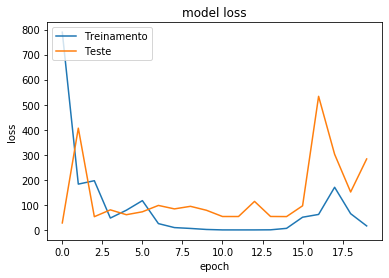

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

In [0]:
#---------------------------------------------------
# Realiza a previsão do modelo
#----------------------------------------------------

#previsão sobre qual imagem corresponde a cada elemento
teste_img, teste_labels=next(batelada_teste)

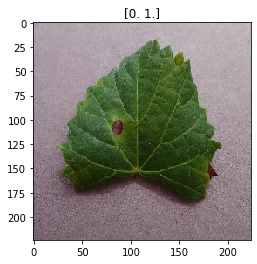

In [0]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(teste_img[0].astype(np.uint8)) 
plt.title("{}".format(teste_labels[0]))
plt.show()  # mostra a imagem

In [0]:
#testar a classificação da imagens 
teste_labels=teste_labels[:,0] # transforma sadias (10) em 1 e contaminadas (01) em apenas 0

In [0]:
#realiza a previsão utilizando os dados de teste
previsao=model.predict_generator(batelada_teste,steps=1,verbose=0)
#como no fit, devemos utilizar o generator, pois estamos utilizando as bateladas de dados 
print(previsao)

[[9.999920e-01 7.935199e-06]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00]
 [0.000000e+00 1.000000e+00]]


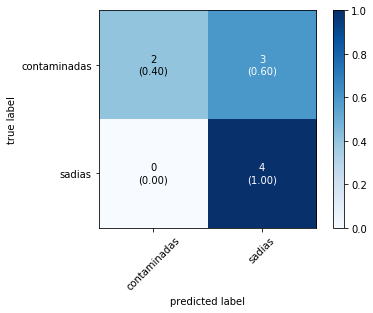

In [0]:
#criando a matriz de confusão para comparar os resultados
matriz_confusao=confusion_matrix(teste_labels[1:],previsao[1:,0])
nomes_das_classes=['contaminadas','sadias']
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=nomes_das_classes)
plt.show()

In [0]:
#-----------------------------------------------------------------------------
#  Melhorando a prevesão do modelo - TRANSFER LEARNING
#----------------------------------------------------------------------------


In [0]:
vgg16_model=tf.keras.applications.vgg16.VGG16() # classe já pre-treinada para ser utilizada em nosso classificador

553467904/553467096 [==============================] - 3763s 7us/step
